### Problem 3 
The third data set provides a set of TLEs for Planet’s Flock 2B 5 satellite at a series of
epochs. For this question, we’ll use regression methods to predict future BStar (drag)
terms.
1

• Regress BStar on epoch. You choose your regression method(s). Use your results
to predict future BStar terms for epoch 3/20/2019 19:23 to 5/19/2019 20:04,
based on data from epochs 5/11/2018 19:56 to 3/20/2019 3:38. Assess how well
your model fits the data. Plot your results.

• Regress BStar on one or more of the numeric columns in the TLE file. 

Assess
how well your regression method models the data. Use your results to predict
future BStar terms for the same epochs as above. Assess how well your regression
method models the data. Plot your results.
Hint: Which orbital element(s) would you expect to be most closely associated
with atmospheric drag?


## Imports


In [35]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score



## Data Parsing and Analysis

In [2]:
df = pd.read_csv("../Data/Week2_Problem3.csv")

In [3]:
df.head()

,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,...,FILE,TLE_LINE0,TLE_LINE1,TLE_LINE2,OBJECT_ID,OBJECT_NUMBER,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE
0,GENERATED VIA SPACETRACK.ORG API,18 SPCS,41616,FLOCK 2P 5,PAYLOAD,U,16040T,5/11/2018 19:56,294304,15.242841,...,2283918,0 FLOCK 2P 5,1 41616U 16040T 18131.83058211 .00001576 0...,2 41616 97.4199 197.0357 0010712 19.7074 340...,2016-040T,41616,6871.072,94.47,500.298,485.577
1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,41616,FLOCK 2P 5,PAYLOAD,U,16040T,5/11/2018 21:30,151904,15.242843,...,2283955,0 FLOCK 2P 5,1 41616U 16040T 18131.89622861 +.00001570 +0...,2 41616 097.4199 197.1007 0010702 019.4876 340...,2016-040T,41616,6871.072,94.47,500.290,485.583
2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,41616,FLOCK 2P 5,PAYLOAD,U,16040T,5/12/2018 14:50,469728,15.242879,...,2284257,0 FLOCK 2P 5,1 41616U 16040T 18132.61833877 +.00001672 +0...,2 41616 097.4199 197.8157 0010632 017.0701 343...,2016-040T,41616,6871.061,94.47,500.231,485.621
3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,41616,FLOCK 2P 5,PAYLOAD,U,16040T,5/12/2018 22:43,705888,15.242887,...,2284359,0 FLOCK 2P 5,1 41616U 16040T 18132.94657067 +.00001604 +0...,2 41616 097.4198 198.1406 0010594 015.9467 344...,2016-040T,41616,6871.059,94.47,500.203,485.644
4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,41616,FLOCK 2P 5,PAYLOAD,U,16040T,5/13/2018 3:26,226848,15.242893,...,2284635,0 FLOCK 2P 5,1 41616U 16040T 18133.14350957 +.00001577 +0...,2 41616 097.4198 198.3356 0010575 015.2670 344...,2016-040T,41616,6871.057,94.47,500.188,485.656


We can see the raw data above. Next, we'll work on transforming the epoch into an integer value, and removing the unnecessary 3 initial columns.(Satellite 41616)

In [4]:
df = df.drop(columns=["COMMENT","ORIGINATOR","OBJECT_TYPE","OBJECT_ID",
                      "NORAD_CAT_ID","OBJECT_NAME","ELEMENT_SET_NO","CLASSIFICATION_TYPE",
                      "INTLDES","FILE","TLE_LINE0","TLE_LINE1","TLE_LINE2","EPHEMERIS_TYPE","EPOCH"],axis=1)

In [5]:
df.head()
# x_train = df.iloc[]

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,OBJECT_NUMBER,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE
0,294304,15.242841,0.001071,97.4199,197.0357,19.7074,340.4576,10468,0.000067,0.000016,0,41616,6871.072,94.47,500.298,485.577
1,151904,15.242843,0.001070,97.4199,197.1007,19.4876,340.6768,10469,0.000067,0.000016,0,41616,6871.072,94.47,500.290,485.583
2,469728,15.242879,0.001063,97.4199,197.8157,17.0701,343.0892,10480,0.000071,0.000017,0,41616,6871.061,94.47,500.231,485.621
3,705888,15.242887,0.001059,97.4198,198.1406,15.9467,344.2102,10485,0.000069,0.000016,0,41616,6871.059,94.47,500.203,485.644
4,226848,15.242893,0.001057,97.4198,198.3356,15.2670,344.8884,10488,0.000067,0.000016,0,41616,6871.057,94.47,500.188,485.656


In [105]:
train=df.sample(frac=0.6,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [106]:
xtrain = train.drop(columns=["BSTAR"],axis=1)
ytrain = train["BSTAR"]
xtest = test.drop(columns=["BSTAR"],axis=1)
ytest = test["BSTAR"]

x_train = train.drop(columns=["BSTAR"],axis=1).to_numpy()
y_train = train["BSTAR"].to_numpy()
x_test = test.drop(columns=["BSTAR"],axis=1).to_numpy()
y_test = test["BSTAR"].to_numpy()

x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)#.reshape(-1,1)
x_test = preprocessing.scale(x_test)
y_test = preprocessing.scale(y_test)

Attempting linear and ridge regression using sklearn instead

linear regression train score: 0.9998640213810527
linear regression test score: 0.969037389236856
ridge regression train score low alpha: 0.9998618501615762
ridge regression test score low alpha: 0.9998743254017695
ridge regression train score high alpha: 0.9991939680063681
ridge regression test score high alpha: 0.9994014881241159


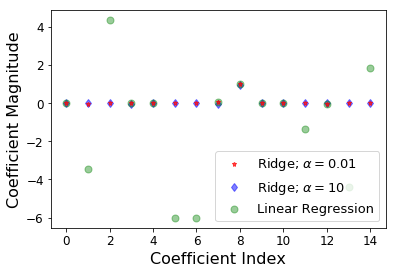

In [107]:
lr = LinearRegression()
lr.fit(x_train, y_train)
rr = Ridge(alpha=.01) 
rr.fit(x_train, y_train)
rr100 = Ridge(alpha=10)
rr100.fit(x_train, y_train)
train_score=lr.score(x_train, y_train)
test_score=r2_score(y_test, lr.predict(x_test))
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [108]:
print(xtrain.columns[1],xtrain.columns[2],xtrain.columns[5],xtrain.columns[6],xtrain.columns[8],xtrain.columns[12],xtrain.columns[14])

MEAN_MOTION ECCENTRICITY ARG_OF_PERICENTER MEAN_ANOMALY MEAN_MOTION_DOT PERIOD PERIGEE


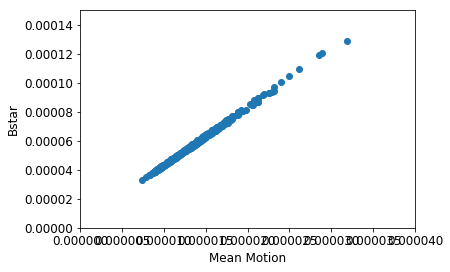

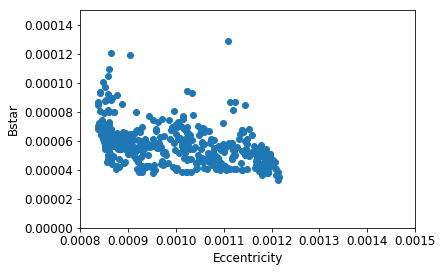

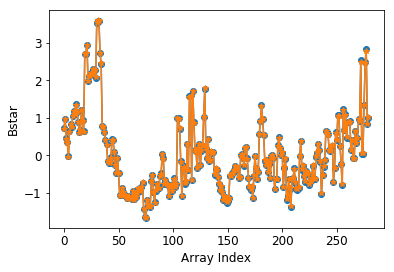

In [111]:
plt.figure()
plt.scatter(xtrain["MEAN_MOTION_DOT"].to_numpy(),ytrain.to_numpy())
pred = rr.predict(x_test)
plt.plot(pred)
plt.xlim(0,.00004)
plt.ylim(0,.00015)
plt.xlabel("Mean Motion")
plt.ylabel("Bstar")
plt.figure()
plt.xlabel("Eccentricity")
plt.ylabel("Bstar")
plt.scatter(xtrain["ECCENTRICITY"].to_numpy(),ytrain.to_numpy())
plt.plot(pred)
plt.xlim(.0008,.0015)
plt.ylim(0,.00015)
plt.figure()
plt.xlabel("Array Index")
plt.ylabel("Bstar")
plt.plot(pred,marker='o')
plt.plot(y_test,marker='*')